In [1]:
"""Create a random forest model using the elemental features."""

import mendeleev
import numpy as np
import pandas as pd
csv_data_source = '/home/dts/Documents/hu/jraph_MPEU/other_models/elem_rf/test_aflow_data.csv'

# Read the data into a dataframe:
aflow_df = pd.read_csv(csv_data_source, index_col=0)

aflow_df.describe()

,spacegroup_relax,Egap,ldau_type,energy_cutoff,energy_atom,density,volume_cell
count,9256.000000,9256.000000,9256.000000,9256.000000,9256.000000,9256.000000,9256.000000
mean,103.097882,1.268404,1.493086,510.544911,-4.978751,4.877792,408.635160
std,76.780812,0.425912,0.870028,155.573732,1.630500,1.722004,391.813904
min,1.000000,0.500400,0.000000,228.300000,-11.273700,0.782568,18.875600
25%,19.000000,0.904600,0.000000,392.000000,-6.202512,3.684633,142.089250
50%,82.000000,1.273550,2.000000,560.000000,-4.853010,4.691305,284.405500
75%,167.000000,1.638525,2.000000,560.000000,-3.787157,5.953200,541.149750
max,230.000000,2.000000,2.000000,980.000000,0.826401,13.319700,3709.970000


In [2]:
aflow_df

,compound,auid,aurl,spacegroup_relax,Pearson_symbol_relax,Egap,catalog,dft_type,ldau_type,energy_cutoff,energy_atom,density,volume_cell
0,Bi2Cu2O2Se2,aflow:9e35f299646ad047,aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/TET/Bi1Cu...,129,tP8,0.5004,ICSD,['PAW_PBE'],2,560.0,-4.37591,8.55326,142.6880
1,Ag1O2Yb1,aflow:4e649734a18d378b,aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/RHL/Ag1O2...,166,hR4,0.5006,ICSD,['PAW_PBE'],2,560.0,-4.66685,8.10596,64.1003
2,As16La8,aflow:8545077050b79e62,aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/MCLC/As2L...,9,mS48,0.5008,ICSD,['PAW_PBE'],2,307.0,-5.68503,6.14617,624.1000
3,Cr8Ho16S32,aflow:6c29fb25feddf527,aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/ORC/Cr1Ho...,29,oP56,0.5010,ICSD,['PAW_PBE'],2,392.0,-6.41363,5.63716,1202.0700
4,I8Nb8Te32,aflow:e390a80e581ba80c,aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/MCL/I1Nb1...,14,mP48,0.5011,ICSD,['PAW_PBE'],2,410.5,-4.09294,5.53337,1753.0700
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9251,Ag2I2,aflow:69a08fb426427ce8,aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/HEX/Ag1I1...,186,hP4,1.9997,ICSD,['PAW_PBE'],2,349.8,-1.41330,5.30532,146.9660
9252,Mn4N8Si4,aflow:b45d24ecca5fda9f,aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/ORC/Mn1N2...,33,oP16,1.9998,ICSD,['PAW_PBE'],2,560.0,-8.14380,4.06599,181.3890
9253,K2Mn2O15Si4Zn4,aflow:4db88ddf58a74301,aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/ORCI/K2Mn...,44,oI54,1.9999,ICSD,['PAW_PBE'],2,560.0,-6.52618,3.56204,373.8390
9254,Al1Cu1O2,aflow:d7ecaf6e3c9e4915,aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/RHL/Al1Cu...,166,hR4,1.9999,ICSD,['PAW_PBE'],2,560.0,-6.06738,4.97498,40.8966


In [3]:
atomic_data_csv = '/home/dts/Documents/hu/jraph_MPEU/other_models/elem_rf/really_tight_full_cut20_revpbe.csv'
atomic_data_df = pd.read_csv(atomic_data_csv, index_col=0)
# atomic_data_df.describe()


sub_features_list = [
    'EA_half', 'IP_half', 'HOMO', 'LUMO', 'rs', 'rp', 's index', 'p index']
atomic_data_df[sub_features_list].describe()

,EA_half,IP_half,HOMO,LUMO,rs,rp,s index,p index
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,-0.133439,8.005121,-4.412885,-2.309800,1.406116,1.647025,25.156863,28.127451
std,1.359551,3.559766,2.365497,1.747167,0.506212,0.779726,14.989597,17.167591
min,-3.640255,3.862009,-15.794577,-7.092348,0.296000,0.253600,1.000000,3.000000
25%,-0.729464,5.777463,-5.509590,-3.280970,1.011200,1.017175,15.000000,16.000000
50%,-0.146451,6.960471,-3.744841,-2.088304,1.424900,1.714200,24.000000,25.000000
75%,0.577931,8.862555,-2.787848,-1.328261,1.800150,2.285250,40.000000,41.000000
max,3.747625,26.826802,-1.397061,2.031140,2.571500,4.467100,51.000000,57.000000


In [4]:
atomic_data_df['atomic_number'] = atomic_data_df.index

In [5]:
atomic_data_df

,Element,EA_half,IP_half,EA_delta,IP_delta,HOMO,LUMO,rs,s index,rp,p index,rd,d index,rf,f index,atomic_number
Atomic number,,,,,,,,,,,,,,,,
1,H,1.055959,13.993807,-1.818744,-1.081840,-6.543722,-6.543722,0.5403,1,1.3810,3,1.3338,7,0.0000,0,1
2,He,3.004933,26.826802,3.080201,27.066837,-15.794577,1.376831,0.2960,1,1.0300,3,0.6615,10,0.0000,0,2
3,Li,0.318876,5.690229,0.203820,5.607457,-3.227621,-1.285962,1.6320,2,1.9472,3,9.9999,14,6.7218,7,3
4,Be,0.774939,9.511429,0.684319,9.562825,-5.614316,-1.984163,1.0849,2,1.2169,3,2.9114,7,0.0000,0,4
5,B,-0.422340,8.341061,-0.587733,8.441792,-3.981294,-3.981294,0.8028,2,0.8370,3,2.1319,10,0.0000,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Cf,1.602567,6.175161,-1.433579,4.009092,-6.175170,-6.175170,1.6818,51,2.1783,57,1.2062,52,0.4604,44,98
99,Es,1.331047,5.944735,0.776738,6.223660,-3.662282,-0.669986,1.7129,51,2.3794,57,1.2522,52,0.4480,44,99
100,Fm,0.887312,5.782202,0.472582,6.209572,-3.664524,-0.453189,1.7145,51,2.4614,52,1.3218,55,0.4367,44,100


In [6]:
# Make sure we have all of the AFLOW columns:

print(aflow_df.columns)

Index(['compound', 'auid', 'aurl', 'spacegroup_relax', 'Pearson_symbol_relax',
       'Egap', 'catalog', 'dft_type', 'ldau_type', 'energy_cutoff',
       'energy_atom', 'density', 'volume_cell'],
      dtype='object')


In [12]:
# Now we need to add some features here according to Wolverton 2016 paper:
# https://www.nature.com/articles/npjcompumats201628#Sec14

#A general-purpose machine learning framework for predicting properties of
# inorganic materials

# Atomic Number, Mendeleev Number,
# Atomic Weight, Melting Temperature, Periodic Table Column, Row,
# Covalent Radius, Electronegativity*, # s Valence Electrons, p Valence Electrons, d Valence Electrons,
# f Valence Electrons, Total # Valance Electrons, Unfilled s States†, Unfilled p States†, Unfilled d States†,
# Unfilled f States†, Total # Unfilled States†, Specific Volume of 0 K Ground State‡,
# Magnetic Moment (per atom) of 0 K ground state‡, Space Group Number of 0 K Ground State‡

# This shouldn't be too computationally heavy since we only have 102 rows. Let's create a function
# that grabs some mendeleev data:

def get_mendeleev_data(data_name, atomic_number_vec):
    """Return data as a column
    
    Args:
        data_name: Name of the data we want to get from mendeleev library.
        atomic_number_vec: List containing the atomic numbers for which we want the elemental
            data from mendeleev.
    Returns:
        List containing the elemental data.
    """
    elemental_data_list = np.zeros(len(atomic_number_vec))
    for i, atomic_number in enumerate(atomic_number_vec):
        mend_atom = mendeleev.element(int(atomic_number))
        elemental_data_list[i] = getattr(mend_atom, data_name)
    return elemental_data_list

# Let's get the covalent_radius_bragg as a test:

desired_properties_list = [
    'atomic_weight',
    'mendeleev_number',  # describes the atomic environment, gets larger in the right corner of periodic table.
    'melting_point',
#     'period',  # Row of periodic table
#     'group',  # Column of the periodic table
    'covalent_radius_cordero',
    'en_allen',  # electronegativity Allen
    'en_ghosh',  # electronegativty Ghosh
    'en_pauling',
    'atomic_volume'
]

for feature in desired_properties_list:
    print(feature)
    atomic_data_df[feature] = get_mendeleev_data(feature, atomic_data_df['atomic_number'])

atomic_data_df['n_valence'] = [mendeleev.element(x).nvalence() for x in atomic_data_df['atomic_number']]

atomic_data_df['HOMO_LUMO_diff'] = atomic_data_df['HOMO'] - atomic_data_df['LUMO']

atomic_weight
mendeleev_number
melting_point
covalent_radius_cordero
en_allen
en_ghosh
en_pauling
atomic_volume


In [13]:
enlarged_atomic_features_data_csv_path = (
    '/home/dts/Documents/hu/jraph_MPEU/other_models/elem_rf/enlarged_elemental_data.csv')
atomic_data_df.to_csv(enlarged_atomic_features_data_csv_path)

In [14]:
atomic_data_df.columns

Index(['Element', 'EA_half', 'IP_half', 'EA_delta', 'IP_delta', 'HOMO', 'LUMO',
       'rs', 's index', 'rp', 'p index', 'rd', 'd index', 'rf', 'f index',
       'atomic_number', 'atomic_weight', 'mendeleev_number', 'melting_point',
       'covalent_radius_cordero', 'en_allen', 'en_ghosh', 'en_pauling',
       'atomic_volume', 'n_valence', 'HOMO_LUMO_diff'],
      dtype='object')

In [15]:
# Ok now we want to create a new dataframe with the atomic features added in.
# Import our data prep module.
import data_prep as dp

data_prep_obj = dp.DataPrep(
    ase_db_path='/None',
    functional='pbe',
    elemental_features_csv=enlarged_atomic_features_data_csv_path)

features_list = [
       'EA_half', 'IP_half', 'EA_delta', 'IP_delta', 'HOMO', 'LUMO',
       'rs', 's index', 'rp', 'p index', 'rd', 'd index', 'rf', 'f index',
       'atomic_number', 'atomic_weight', 'mendeleev_number', 'melting_point',
       'covalent_radius_cordero', 'en_allen', 'en_ghosh',
       'en_pauling', 'atomic_volume', 'n_valence', 'HOMO_LUMO_diff']

compound_name_list = aflow_df['compound']

feature_engineered_data_df_with_compound = data_prep_obj.get_features_df(
    compound_name_list=compound_name_list, features_list=features_list)


In [18]:
feature_engineered_data_df_with_compound = feature_engineered_data_df_with_compound.rename(
    columns={"compound_name": "compound"})

In [27]:
# We want to include some AFLOW data into the dataframe based on the compound name

merged_feature_df = pd.merge(feature_engineered_data_df_with_compound, aflow_df, on="compound")
# Ideally should include ldau type in the future.
merged_feature_df = merged_feature_df.drop(
    columns=[
        'catalog', 'auid', 'Pearson_symbol_relax', 'aurl', 'dft_type', 'ldau_type',
        'compound'])

In [28]:
merged_feature_df.columns

Index(['EA_delta_bar', 'EA_delta_hat', 'EA_half_bar', 'EA_half_hat',
       'HOMO_LUMO_diff_bar', 'HOMO_LUMO_diff_hat', 'HOMO_bar', 'HOMO_hat',
       'IP_delta_bar', 'IP_delta_hat', 'IP_half_bar', 'IP_half_hat',
       'LUMO_bar', 'LUMO_hat', 'atomic_number_bar', 'atomic_number_hat',
       'atomic_volume_bar', 'atomic_volume_hat', 'atomic_weight_bar',
       'atomic_weight_hat', 'covalent_radius_cordero_bar',
       'covalent_radius_cordero_hat', 'd index_bar', 'd index_hat',
       'en_allen_bar', 'en_allen_hat', 'en_ghosh_bar', 'en_ghosh_hat',
       'en_pauling_bar', 'en_pauling_hat', 'f index_bar', 'f index_hat',
       'melting_point_bar', 'melting_point_hat', 'mendeleev_number_bar',
       'mendeleev_number_hat', 'n_valence_bar', 'n_valence_hat', 'p index_bar',
       'p index_hat', 'rd_bar', 'rd_hat', 'rf_bar', 'rf_hat', 'rp_bar',
       'rp_hat', 'rs_bar', 'rs_hat', 's index_bar', 's index_hat',
       'spacegroup_relax', 'Egap', 'energy_cutoff', 'energy_atom', 'density',
   

In [30]:
merged_feature_df.describe()

,EA_delta_bar,EA_delta_hat,EA_half_bar,EA_half_hat,HOMO_LUMO_diff_bar,HOMO_LUMO_diff_hat,HOMO_bar,HOMO_hat,IP_delta_bar,IP_delta_hat,...,rd_bar,rd_hat,rf_bar,rf_hat,rp_bar,rp_hat,rs_bar,rs_hat,s index_bar,s index_hat
count,9256.000000,9256.000000,9256.000000,9256.000000,9256.000000,9256.000000,9256.000000,9256.000000,9256.000000,9256.000000,...,9256.000000,9256.000000,9256.000000,9256.000000,9256.000000,9256.000000,9256.000000,9256.000000,9256.000000,9256.000000
mean,-1.342693,0.772616,-1.208150,0.774384,-1.565434,1.137243,-5.526354,1.255172,9.680761,2.301876,...,1.748274,0.891678,0.089338,0.102291,1.028888,0.395168,0.992167,0.367592,12.559021,6.846090
std,0.642862,0.389181,0.669896,0.406184,1.918696,1.096620,0.965539,0.606627,1.853406,1.288209,...,1.070869,0.803765,0.476257,0.458119,0.280128,0.203186,0.239875,0.195929,6.233729,4.036798
min,-3.776484,0.000000,-3.582329,0.000000,-10.626063,0.000000,-9.713825,0.000000,0.279914,0.000000,...,0.228200,0.000000,0.000000,0.000000,0.334700,0.000000,0.458800,0.000000,1.400000,0.000000
25%,-1.559460,0.530831,-1.465844,0.507168,-2.135545,0.422343,-6.094690,0.819407,8.409876,1.377871,...,1.194703,0.448221,0.000000,0.000000,0.825929,0.251245,0.824454,0.206756,7.691106,4.000000
50%,-1.292513,0.731813,-1.177709,0.724954,-0.682225,0.728122,-5.523260,1.247402,9.573205,2.144169,...,1.682969,0.761950,0.000000,0.000000,1.018044,0.387380,0.970438,0.354875,11.500000,6.375000
75%,-1.032669,0.998532,-0.877113,1.027378,-0.378039,1.472164,-4.827958,1.642591,10.937456,3.098954,...,2.026458,0.985217,0.000000,0.000000,1.237145,0.530588,1.118825,0.522275,16.500000,9.333333
max,0.724379,2.665016,0.942956,2.579423,0.000000,5.574729,-3.178593,3.602053,16.839823,8.192033,...,8.002475,4.873650,5.041350,3.360900,2.097450,1.081800,2.133500,1.056350,36.000000,20.571429


In [31]:
merged_feature_df.columns

Index(['EA_delta_bar', 'EA_delta_hat', 'EA_half_bar', 'EA_half_hat',
       'HOMO_LUMO_diff_bar', 'HOMO_LUMO_diff_hat', 'HOMO_bar', 'HOMO_hat',
       'IP_delta_bar', 'IP_delta_hat', 'IP_half_bar', 'IP_half_hat',
       'LUMO_bar', 'LUMO_hat', 'atomic_number_bar', 'atomic_number_hat',
       'atomic_volume_bar', 'atomic_volume_hat', 'atomic_weight_bar',
       'atomic_weight_hat', 'covalent_radius_cordero_bar',
       'covalent_radius_cordero_hat', 'd index_bar', 'd index_hat',
       'en_allen_bar', 'en_allen_hat', 'en_ghosh_bar', 'en_ghosh_hat',
       'en_pauling_bar', 'en_pauling_hat', 'f index_bar', 'f index_hat',
       'melting_point_bar', 'melting_point_hat', 'mendeleev_number_bar',
       'mendeleev_number_hat', 'n_valence_bar', 'n_valence_hat', 'p index_bar',
       'p index_hat', 'rd_bar', 'rd_hat', 'rf_bar', 'rf_hat', 'rp_bar',
       'rp_hat', 'rs_bar', 'rs_hat', 's index_bar', 's index_hat'],
      dtype='object')

In [38]:
merged_feature_df.to_csv('/home/dts/Documents/hu/jraph_MPEU/other_models/elem_rf/merged_df_ml_ready.csv', index=False)

In [39]:
# Drop columns with NaN for now:

merged_feature_df = merged_feature_df.dropna()

In [40]:
y_data = merged_feature_df['Egap']
merged_feature_df = merged_feature_df.drop(columns=['Egap'])

In [41]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    merged_feature_df, y_data, test_size=0.2, random_state=42)

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression


regr = RandomForestRegressor(max_depth=50, random_state=42, max_features="sqrt", min_samples_leaf=10)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=50, max_features='sqrt', min_samples_leaf=10,
                      random_state=42)

In [44]:
y_pred = regr.predict(X_test)

In [47]:
# Now get statistics on the fit:

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print(f'The mean absolute error of the fit is: {mean_absolute_error(y_test, y_pred)}')
print(f'The root mean squared error of the fit is: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'The r2 of the fit is: {r2_score(y_test, y_pred)}')

The mean absolute error of the fit is: 0.043008303957458444
The mean root squared error of the fit is: 0.11518137287248051
The r2 of the fit is: 0.935292681788688


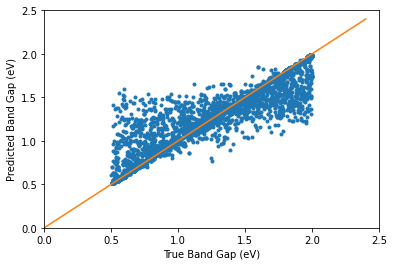

In [48]:
import matplotlib.pyplot as plt

plt.plot(y_test, y_pred, '.')
plt.xlim([0.0, 2.5])
plt.ylim([0.0, 2.5])
plt.xlabel('True Band Gap (eV)')
plt.ylabel('Predicted Band Gap (eV)')
x = np.arange(0, 2.5, 0.1)
plt.plot(x, x, '-')

# What happens if we predict the mean

In [ ]:
# What happens if we simply predict the mean of the data? What MAE do we get?
y_mean = np.mean(y_train)
y_mean_vec = np.ones(len(y_test))*y_mean
print(f'The mean absolute error of predicting the mean is: {mean_absolute_error(y_test, y_mean_vec)}')


# Linear Model

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
print(f' the regression test R2 score is: {reg.score(X_test, y_test)}')
print(f'The reg.coef_ is: {reg.coef_}')
print('The reg.intercept_ is {reg.intercept_}')

y_pred= reg.predict(X_test)

In [ ]:
print(f'The mean absolute error of the fit is: {mean_absolute_error(y_test, y_pred)}')
print(f'The mean root squared error of the fit is: {np.sqrt(mean_squared_error(y_test, y_pred))}')
import matplotlib.pyplot as plt

plt.plot(y_test, y_pred, '.')
plt.xlim([0.0, 2.5])
plt.ylim([0.0, 2.5])
plt.xlabel('True Band Gap (eV)')
plt.ylabel('Predicted Band Gap (eV)')
x = np.arange(0, 2.5, 0.1)
plt.plot(x, x, '-')

# Correlation of Features

In [ ]:
import seaborn as sns
# feature_engineered_data_df = feature_engineered_data_df.reset_index()
# aflow_df = aflow_df.reset_index()

print(type(aflow_df.compound[0]))
print(feature_engineered_data_df_with_compound.columns)
feature_engineered_data_df_with_compound = feature_engineered_data_df_with_compound.rename(
    columns={"compound_name": "compound"})
combined_df = pd.merge(feature_engineered_data_df_with_compound, aflow_df, on='compound', how='outer')

print(combined_df.columns)
combined_df = combined_df.drop(
    columns=['aurl', 'ldau_type', 'auid', 'compound', 'spacegroup_relax', 'Pearson_symbol_relax',
             'catalog', 'dft_type', 'energy_atom', 'level_0', 'index'])
print(combined_df.columns)

print(combined_df)


In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.title("Correlation Plot")
sns.heatmap(combined_df)